# L3.5 - Convolution from scratch

(I * K)(i,j) = sigma(M).sigma(n)(I(i + m, j+n).K(m,n)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
# Visualization of convolution operation
def visualize_convolution(image, kernel, feature_map):
    fig, axes = plt.subplots(1,3, figsize=(15,5))

    # display the input image
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Input Image", fontsize=14)
    axes[0].axis('off')

    # display the kernel filter
    # use a diverging colormap with kernals in positive and negative values
    axes[1].imshow(kernel, cmap='viridis')
    axes[1].set_title(f'Kernel/filter ({kernel.shape[0]}x{kernel.shape[1]})', fontsize=14)
    # add annotations for kernel values
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            axes[1].text(j,i, f'{kernel[i,j]}',ha='center', va='center', color='white', fontsize=14)

    # display the resulting feature map
    axes[2].imshow(feature_map, cmap='gray')
    axes[2].set_title('output Feature Map', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
def convolve_image(image, kernel):
    i_height, i_width = image.shape
    k_height, k_width = kernel.shape

    o_height = i_height - k_height + 1
    o_width = i_width - k_width + 1

    output = np.zeros((o_height, o_width))

    for i in range(o_height):
        for j in range(o_width):
            window = image[i:i+k_height, j:j+k_width]
            # element wise multiplication and sum
            output[i,j] = np.sum(window * kernel)
    return output


In [5]:
# create a simple image 12x12 with a white square
# has a clear horizontal and vertical edges
import numpy as np

image = np.zeros((12,12))
image[3:9, 3:9] = 1

# horizontal edge
kernels = {
    "horizonal": np.array([
        [1,1,1],
        [0,0,0],
        [-1,-1,-1]
    ]),
    "vertical": np.array([
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
    ]),
    "sharpening": np.array([
        [0, -1, 0],
        [-1,5,-1],
        [0, -1, 0]
    ])
}

===[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]===


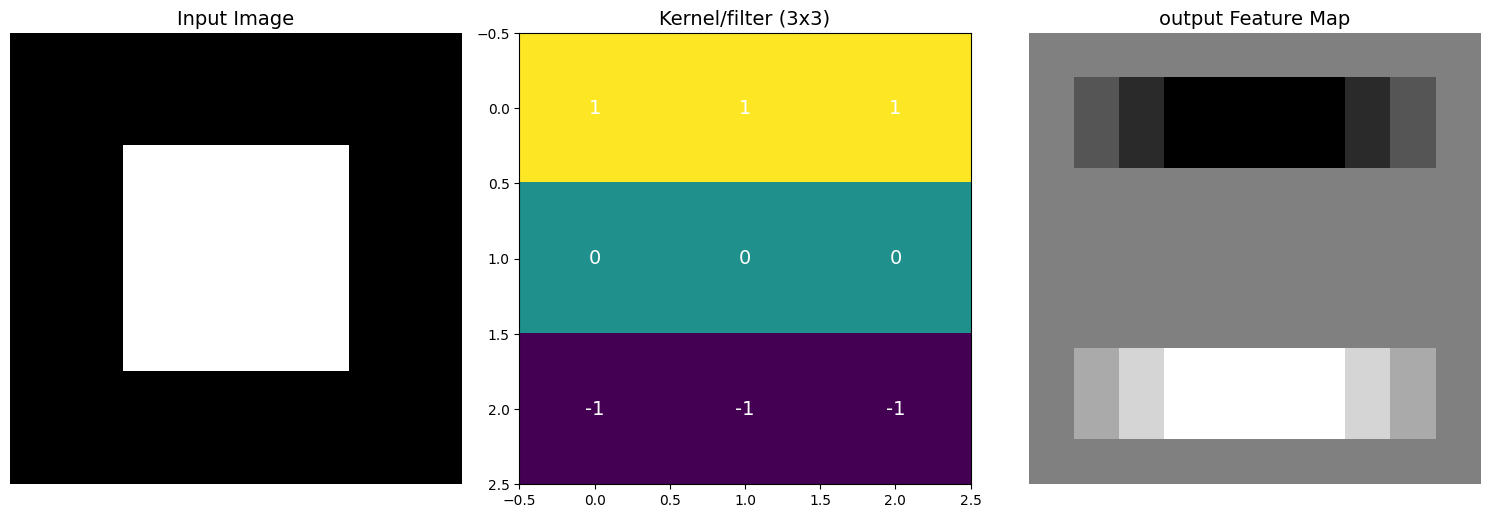

===[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]===


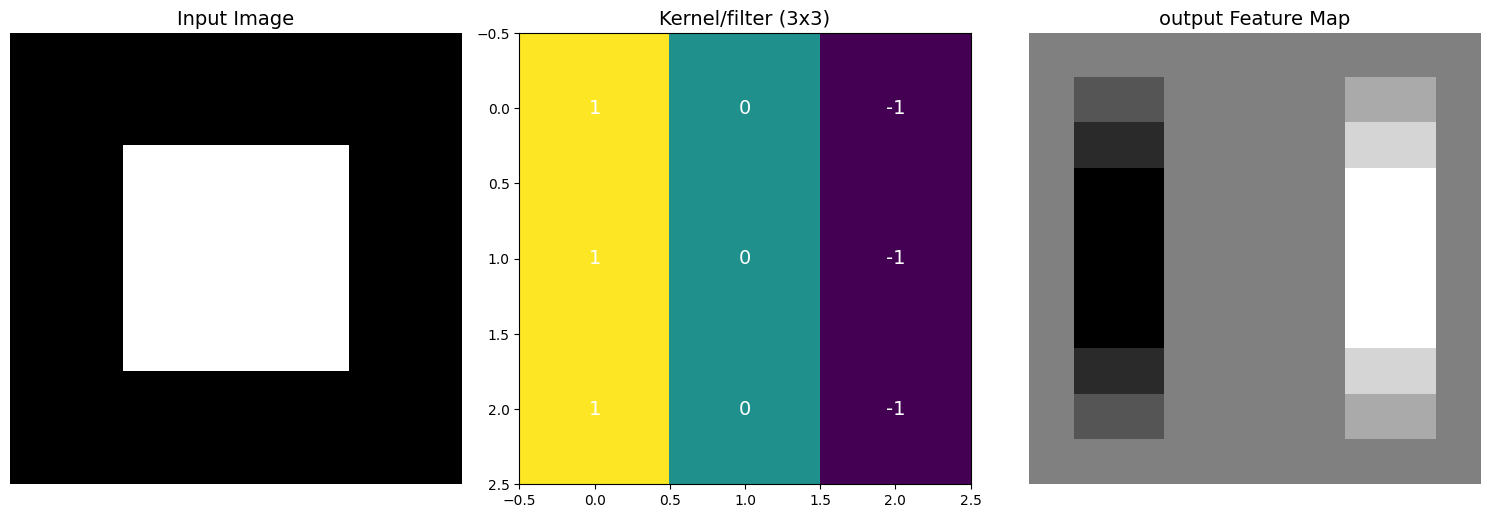

===[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]===


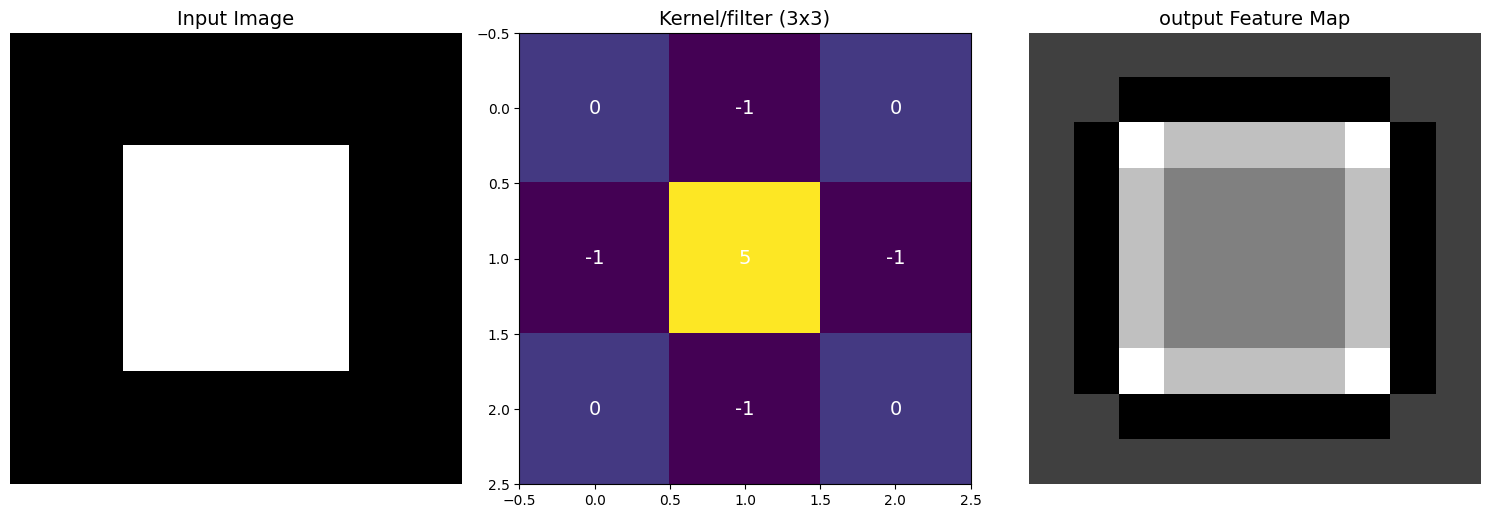

In [6]:
# display convolution
for name, kernel in kernels.items():
    feature_map = convolve_image(image, kernel)

    feature_map = (feature_map - feature_map.min())/(feature_map.max() - feature_map.min() + 1e-8)

    print(f"==={kernel}===")
    visualize_convolution(image, kernel, feature_map)

# L3.6 - Pooling from scratch

types of pooling
* max pooling
    * taking max value from local region
    * most common
    * most prominent features
* Avg pooling
    * takes average
    * preserves more backgorund information
    * sometimes used in final layers
* global pooling
    * reduces each feature map to single value (max or average)
    * often used before fuly connected layers
    * make network accepts input of variable size

Benefits of pooling
* dimensionality reduction
* feature robustness
* increased receptive field

In [7]:
def visualize_pooling(image, pool_size=2, stride=2):
    # manual implementation of pooling
    def max_pool(image, pool_size, stride):
        h, w = image.shape
        h_out = (h - pool_size) // stride + 1
        w_out = (w - pool_size) // stride + 1
        result = np.zeros((h_out, w_out))

        for i in range(0, h_out):
            for j in range(0, w_out):
                result[i, j] = np.max(image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size])
        return result

    def avg_pool(image, pool_size, stride):
        h, w = image.shape
        h_out = (h - pool_size) // stride + 1
        w_out = (w - pool_size) // stride + 1
        result = np.zeros((h_out, w_out))

        for i in range(0, h_out):
            for j in range(0, w_out):
                result[i,j] = np.mean(image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size])
        return result

    max_pooled = max_pool(image, pool_size, stride)
    avg_pooled = avg_pool(image, pool_size, stride)

    fig, axes = plt.subplots(1,3, figsize=(15,5))

    im0 = axes[0].imshow(image, cmap='viridis')
    axes[0].set_title(f'Original Image ({image.shape[0]}x{image.shape[1]})', fontsize=14)
    axes[0].axis('off')
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(max_pooled, cmap='viridis')
    axes[1].set_title(f'Max Pooling ({pool_size}x{pool_size}) stride={stride}', fontsize=14)
    axes[1].axis('off')
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    im2 = axes[2].imshow(avg_pooled, cmap='viridis')
    axes[2].set_title(f'Avg Pooling ({pool_size}x{pool_size}) stride={stride}', fontsize=14)
    axes[2].axis('off')
    plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

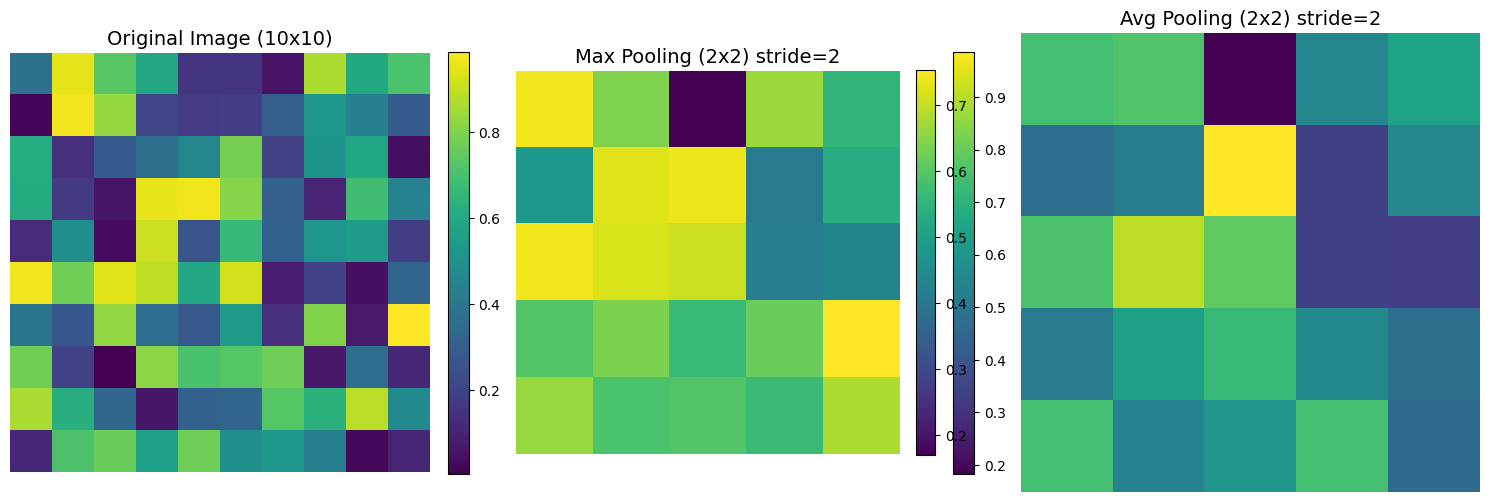

In [8]:
np.random.seed(42)
test_image = np.random.rand(10,10)

visualize_pooling(test_image, pool_size=2, stride=2)

# L3.7 - Convolution in Pytorch

In [9]:
def explore_conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):
    # create a random input tensor
    batch_size=1

    input_height, input_width = 28, 28

    x = torch.randn(batch_size, in_channels, input_height, input_width)


    conv_layer = nn.Conv2d(
        in_channels = in_channels,
        out_channels = out_channels,
        kernel_size = kernel_size,
        stride=stride,
        padding=padding
    )

    # basically the forward pass
    output = conv_layer(x)

    # calculate what the output sizes should be
    output_height = ((input_height + 2 * padding - kernel_size) // stride) + 1
    output_width = ((input_width + 2 * padding - kernel_size) // stride) + 1

    total_parameters = sum(p.numel() for p in conv_layer.parameters())

    # basically parameters are two types here,
    # first is the weights, they are kernel size^2 for each output channel,
    # once again the above for each input cahannel
    weights_size = in_channels * out_channels * kernel_size * kernel_size
    # bias is located in every output channel
    bias_size = out_channels

    if out_channels <= 6 and in_channels <= 3:
        # basically take the convolution layer, take their weights
        # detach them to disable grad or accidentally initialize again
        # clone to create a clone and then convert to numpy
        weights = conv_layer.weight.detach().clone().numpy()

        fix, axes = plt.subplots(out_channels, in_channels, figsize=(2*in_channels, 2*out_channels), squeeze=False)

        for i in range(out_channels):
            for j in range(in_channels):
                filter_weights=weights[i,j]

                im = axes[i,j].imshow(filter_weights, cmap='viridis')

                axes[i,j].set_title(f"out {i+1}, In {j+1}")

                axes[i,j].axis('off')

        plt.suptitle("Visualization of randomly initialized filters", fontsize=16)
        plt.tight_layout()
        plt.show()

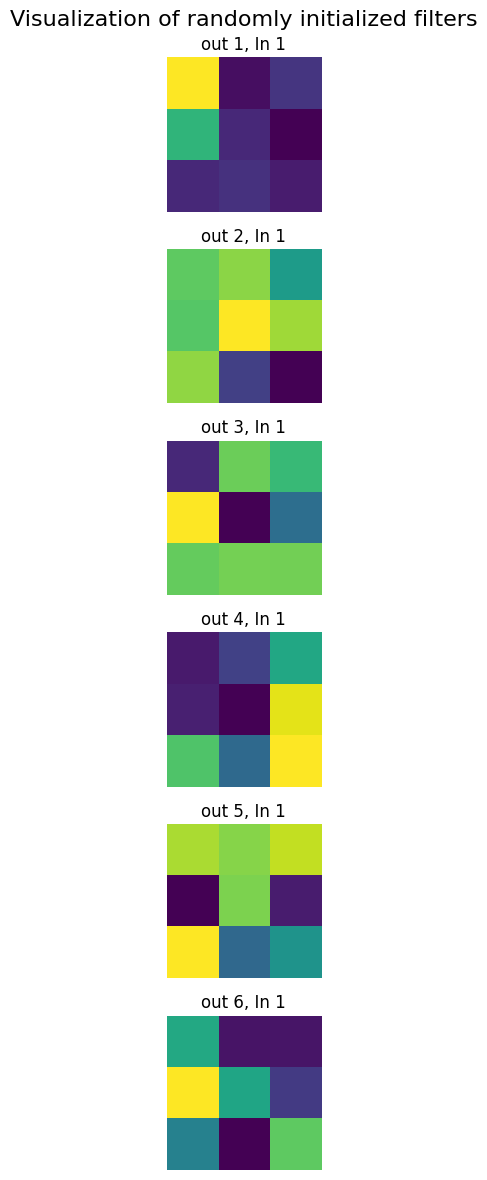

In [10]:
# Example 1
explore_conv2d(in_channels=1, out_channels=6, kernel_size=3)

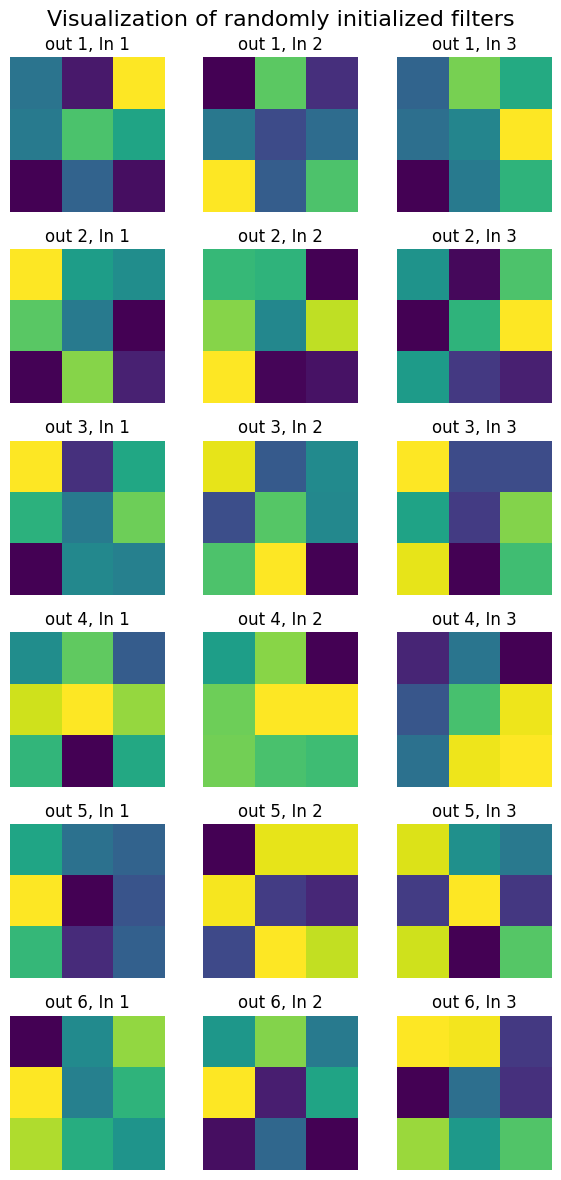

In [11]:
explore_conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1)

# L3.10 - pooling in pytorch

In [12]:
def explore_pooling():
    list_ = np.arange(1, 37)
    list_ = list_.reshape(6,6)
    print(list_)
    feature_map = torch.tensor(list_).unsqueeze(0).unsqueeze(0)
    print(feature_map)

    max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    max_result = max_pool(feature_map)
    avg_result = avg_pool(feature_map)

    print(max_result.squeeze().numpy())
    print(avg_result.squeeze().numpy())

explore_pooling()

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]
tensor([[[[ 1,  2,  3,  4,  5,  6],
          [ 7,  8,  9, 10, 11, 12],
          [13, 14, 15, 16, 17, 18],
          [19, 20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29, 30],
          [31, 32, 33, 34, 35, 36]]]])
[[ 8 10 12]
 [20 22 24]
 [32 34 36]]
[[ 4  6  8]
 [16 18 20]
 [28 30 32]]


# L3.11 - CNN Image Classification: Simple CNN Implementation

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1
        )

        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=1, stride=2)

        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(3 * 3 * 128, 128)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

    def feature_maps(self, x):
        feature_maps = {}

        x = self.conv1(x)
        feature_maps['conv1'] = x.detach().clone()
        x = self.relu1(x)
        x = self.pool1(x)
        feature_maps['pool1'] = x.detach().clone()

        x = self.conv2(x)
        feature_maps['conv2'] = x.detach().clone()
        x = self.relu2(x)
        x = self.pool2(x)
        feature_maps['pool2'] = x.detach().clone()

        x = self.conv3(x)
        feature_maps['conv3'] = x.detach().clone()
        x = self.relu3(x)
        x = self.pool3(x)
        feature_maps['pool3'] = x.detach().clone()

        return feature_maps

In [14]:
model = SimpleCNN()

print(model)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=1, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# L3.12 - CNN Image Classification: Data preprocessing and DataLoaders

In [15]:
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

In [16]:
import matplotlib.pyplot as plt

In [17]:
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [18]:
batch_size = 64
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

In [19]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

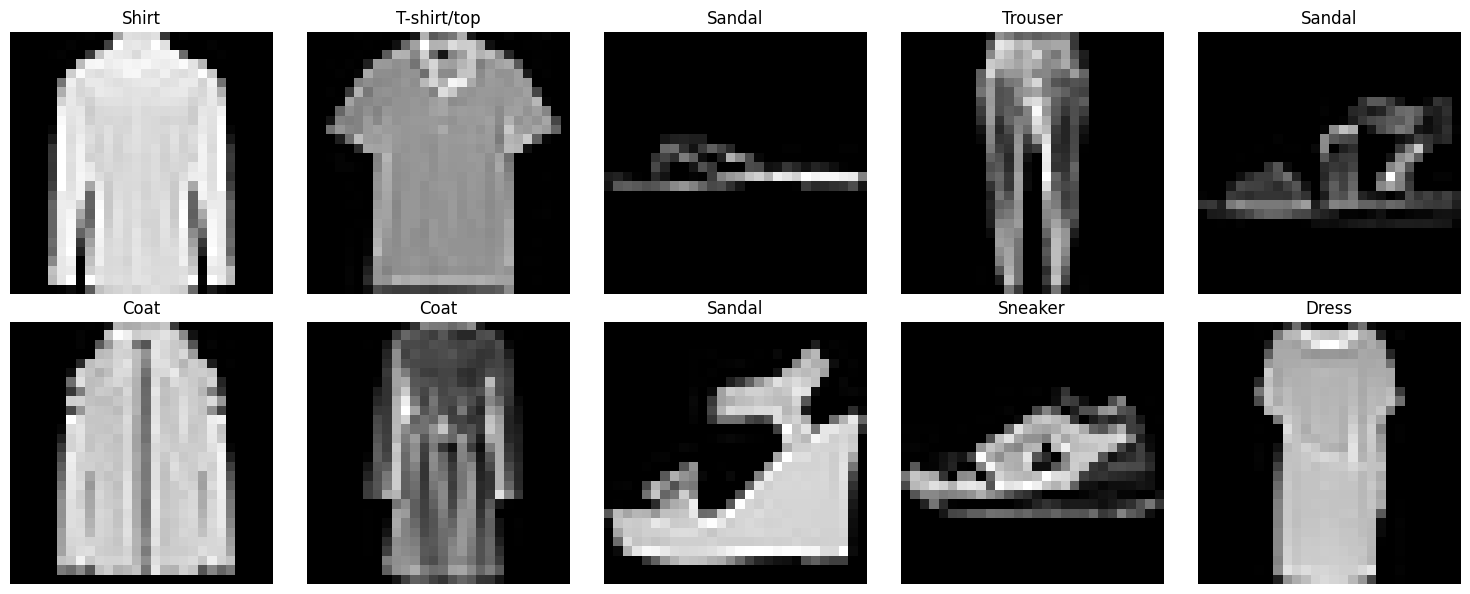

In [20]:
def show_samples(dataloader, num_samples=10):
  data_iter = iter(dataloader)
  images, labels = next(data_iter)

  fig, axes = plt.subplots(2,5, figsize=(15,6))

  axes = axes.flatten()

  for i in range(num_samples):
    img = images[i].squeeze().numpy()
    label = labels[i].item()

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"{class_names[label]}")
    axes[i].axis('off')
  plt.tight_layout()
  plt.show()

show_samples(train_loader)

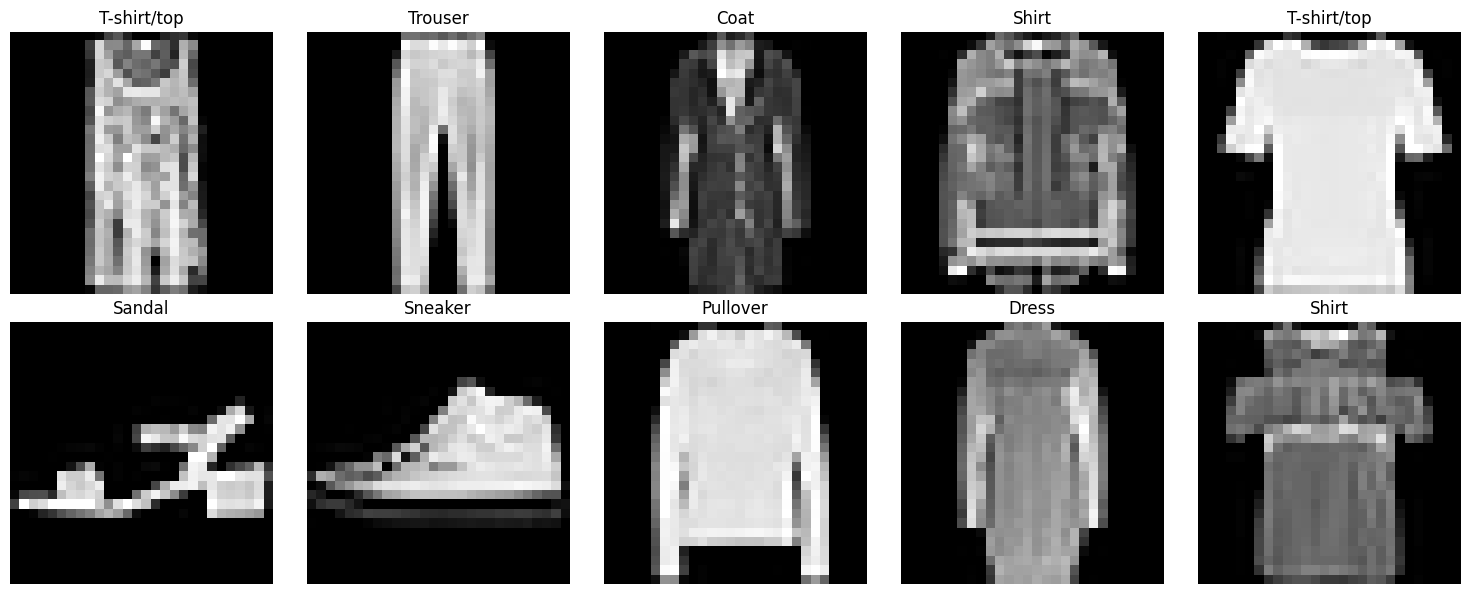

In [21]:
show_samples(train_loader)

# L3.13 - CNN Image Classification - Model Training

In [22]:
if torch.cuda.is_available():
  print("CUDA is available! You can use GPU for training.")
  device = torch.device("cuda")
else:
  print("CUDA is not available. Using CPU for training.")
  device = torch.device("cpu")

print(f"Using device: {device}")

CUDA is available! You can use GPU for training.
Using device: cuda


In [23]:
device = 'cuda'

In [24]:
import torch.optim as optim

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss() # Standard loss for multiclass
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [25]:
import time
from tqdm import tqdm

In [28]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
  # train model
  train_losses = []
  train_accuracies = []
  start_time = time.time()

  for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(enumerate(train_loader),
                        total=len(train_loader),
                        desc=f'Epoch {epoch+1}/{num_epochs}')
    # Iterate over batches
    for i, (inputs, labels) in progress_bar:
      # move data to device
      inputs, labels = inputs.to(device), labels.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward Pass
      outputs = model(inputs)

      # loss
      loss = criterion(outputs, labels)

      # Backward Pass
      loss.backward()

      # Update
      optimizer.step()

      # Update statistics (internal of nn)
      running_loss += loss.item()
      _, predicted = outputs.max(1)
      total +=  labels.size(0)
      correct += predicted.eq(labels).sum().item()

      # update progress bar
      avg_loss = running_loss/ (i + 1)
      accuracy = 100 * correct/total
      progress_bar.set_postfix({
          'loss': f'{avg_loss:.4f}',
          'accuracy': f'{accuracy:.2f}%'
      })
    # Calculate epoch level metrics
    epoch_loss = running_loss/len(train_loader)
    epoch_accuracy = 100 * correct/total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"\nEpoch: {epoch+1}; Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    print(elapsed_time)

  return train_losses, train_accuracies

Epoch 1/5: 100%|██████████| 938/938 [00:21<00:00, 42.71it/s, loss=0.2080, accuracy=92.38%]


Epoch: 1; Train Loss: 0.2080, Train Accuracy: 92.38%
21.98737382888794



Epoch 2/5: 100%|██████████| 938/938 [00:23<00:00, 40.09it/s, loss=0.1878, accuracy=93.20%]


Epoch: 2; Train Loss: 0.1878, Train Accuracy: 93.20%
45.41518211364746



Epoch 3/5: 100%|██████████| 938/938 [00:21<00:00, 42.90it/s, loss=0.1700, accuracy=93.76%]


Epoch: 3; Train Loss: 0.1700, Train Accuracy: 93.76%
67.3029727935791



Epoch 4/5: 100%|██████████| 938/938 [00:21<00:00, 42.86it/s, loss=0.1539, accuracy=94.18%]


Epoch: 4; Train Loss: 0.1539, Train Accuracy: 94.18%
89.20728778839111



Epoch 5/5: 100%|██████████| 938/938 [00:22<00:00, 41.87it/s, loss=0.1403, accuracy=94.80%]



Epoch: 5; Train Loss: 0.1403, Train Accuracy: 94.80%
111.62943363189697


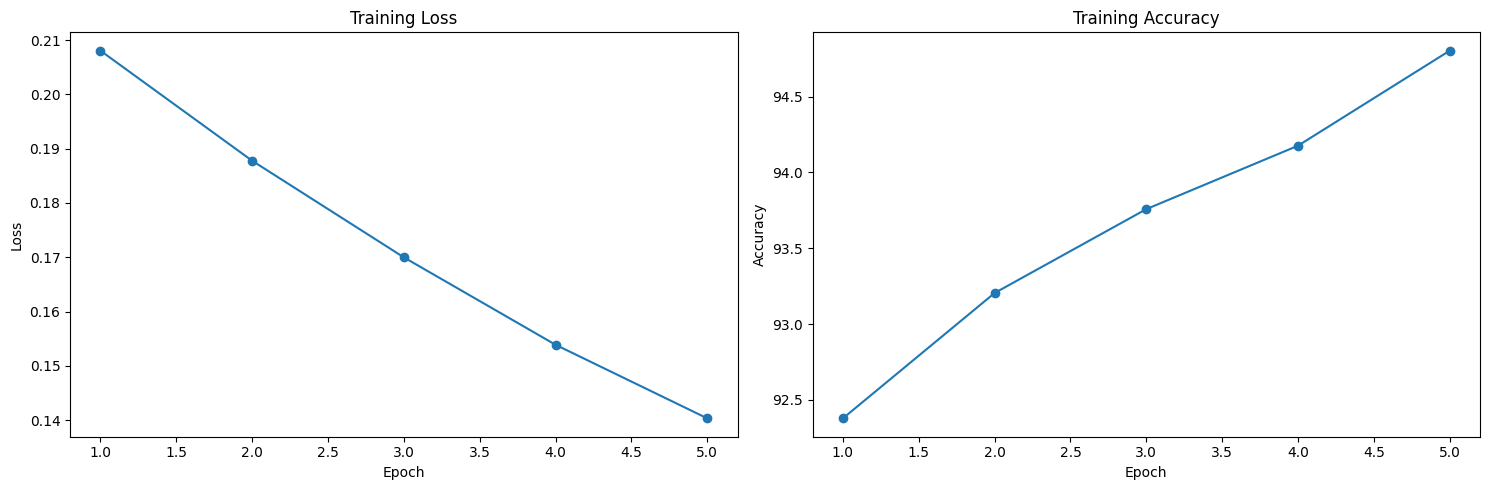

In [29]:
num_epochs = 5
train_losses, train_accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(range(1, num_epochs + 1), train_losses, marker='o')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training Loss")

ax2.plot(range(1, num_epochs + 1), train_accuracies, marker='o') # Corrected this line
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training Accuracy")

plt.tight_layout()
plt.show()